In [ ]:
# plot image features from csv file ./all_new_features_hier_norm.csv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# read csv file
df = pd.read_csv('./all_new_features_hier_norm.csv')
# df = df.drop(['Unnamed: 0'], axis=1)


In [2]:
df.describe()


,Mobilnet_v1,Inception_v4,Resnet_v_152,kpSurf,brightnessAverageToPerceived,contrast,area_by_perim,aspect_ratio,edge_count,hue2
count,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000
mean,0.707474,0.707474,0.707474,-0.368159,-0.368159,-0.368159,-0.368159,-0.368159,2.208956,-0.368159
std,0.454927,0.454927,0.454927,0.000344,0.000344,0.000344,0.000344,0.000344,1.143359,0.000344
min,0.000000,0.000000,0.000000,-0.368590,-0.369215,-0.369080,-0.368221,-0.368307,-0.358523,-0.368162
25%,0.000000,0.000000,0.000000,-0.368410,-0.368345,-0.368368,-0.368213,-0.368278,1.337856,-0.368162
50%,1.000000,1.000000,1.000000,-0.368247,-0.368146,-0.368091,-0.368210,-0.368233,2.098800,-0.368162
75%,1.000000,1.000000,1.000000,-0.367917,-0.367965,-0.367901,-0.368207,-0.368134,3.003260,-0.368162
max,1.000000,1.000000,1.000000,-0.351625,-0.366946,-0.367435,-0.360699,-0.340277,7.733435,-0.312518


In [9]:
feat_df = df.iloc[:, 4:]
feat_df.drop(['edge_count','hue2'], axis=1, inplace=True)


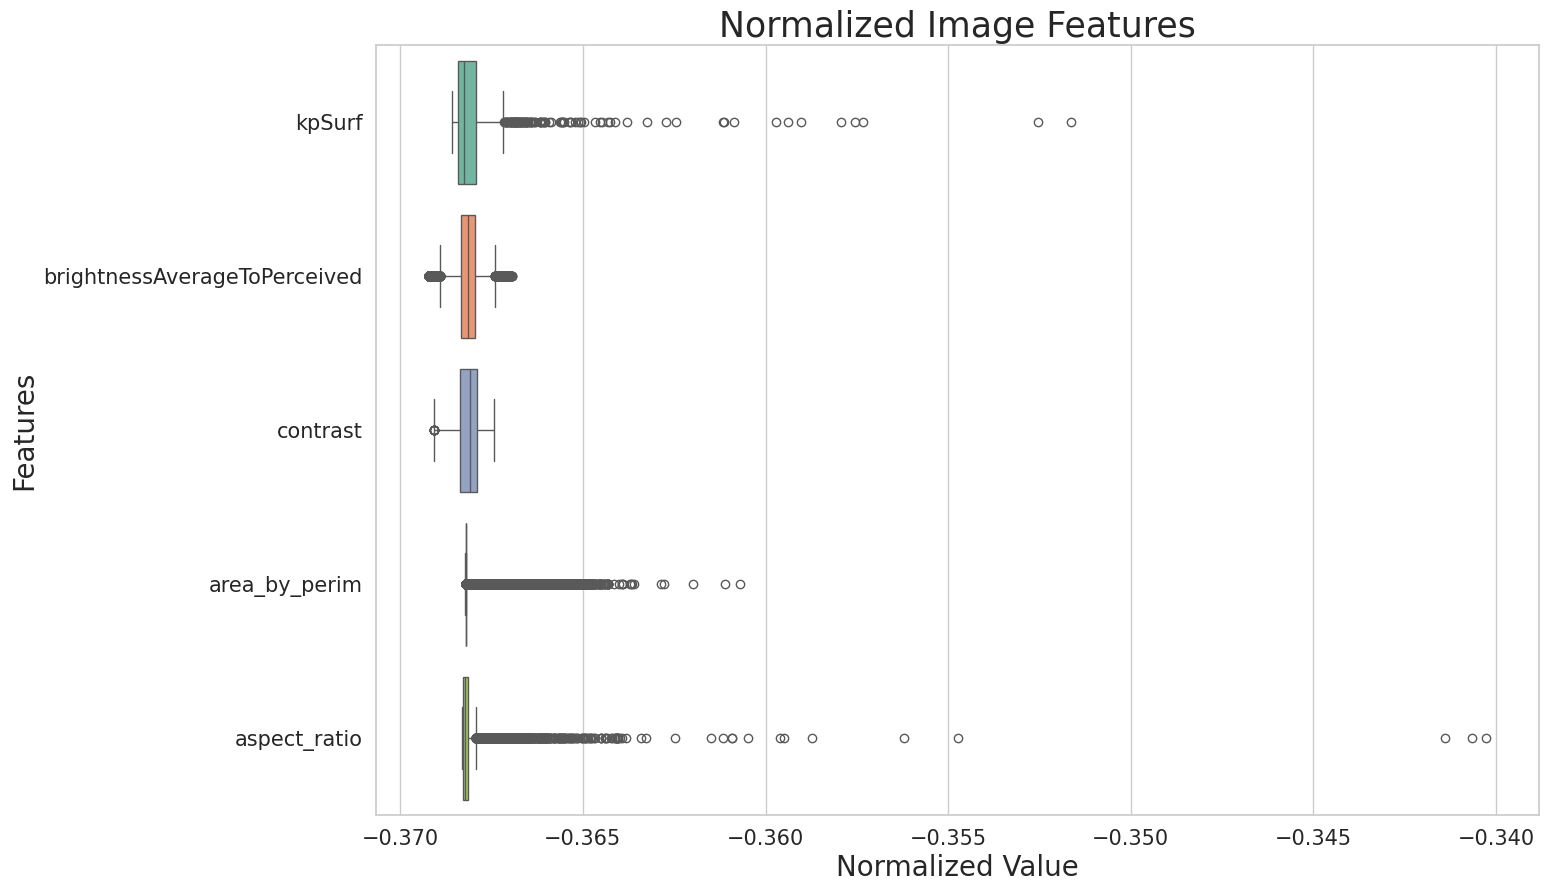

In [10]:

# plot
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))
ax = sns.boxplot(data=feat_df, orient="h", palette="Set2")
plt.xlabel('Normalized Value', fontsize=20)
plt.ylabel('Features', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Normalized Image Features', fontsize=25)
plt.show()


In [15]:
feat_df = df.iloc[:, 4:]


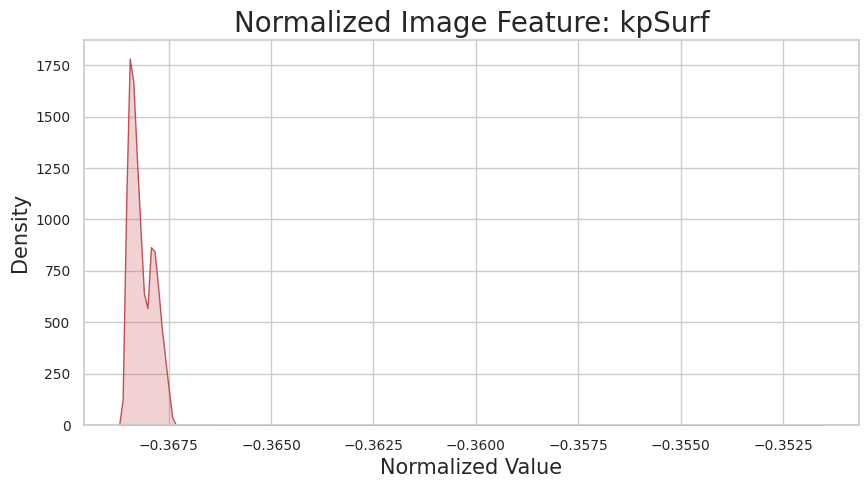

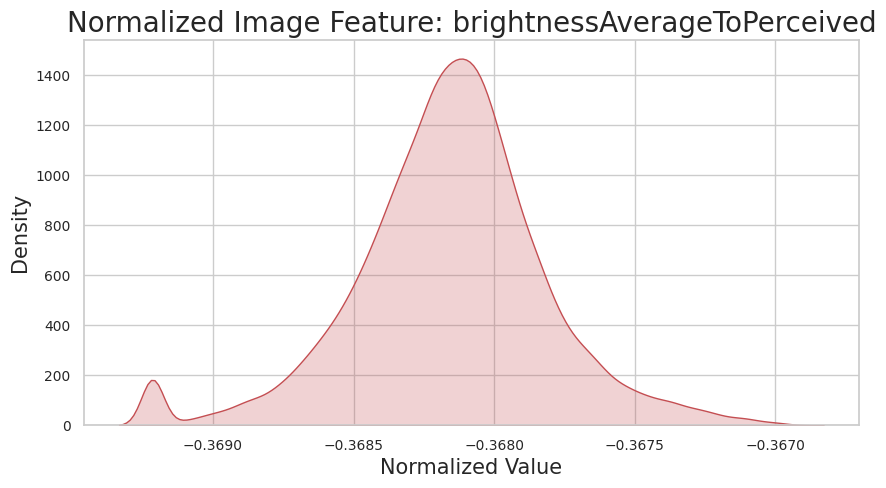

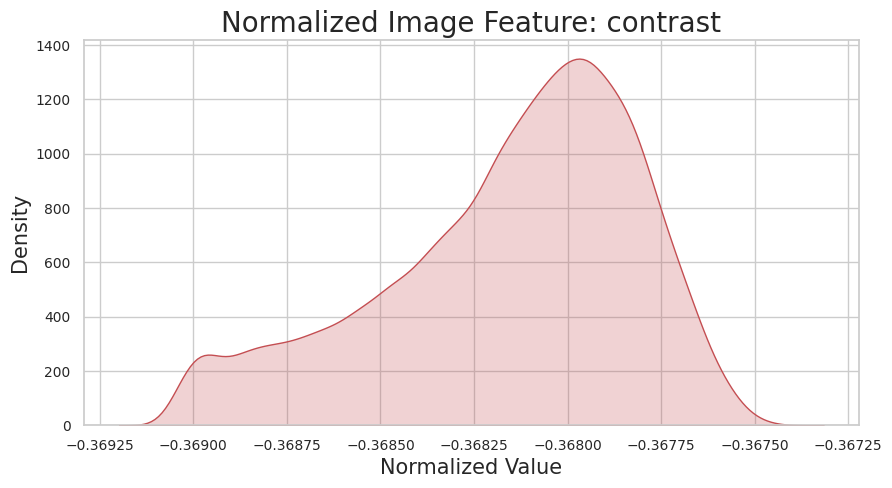

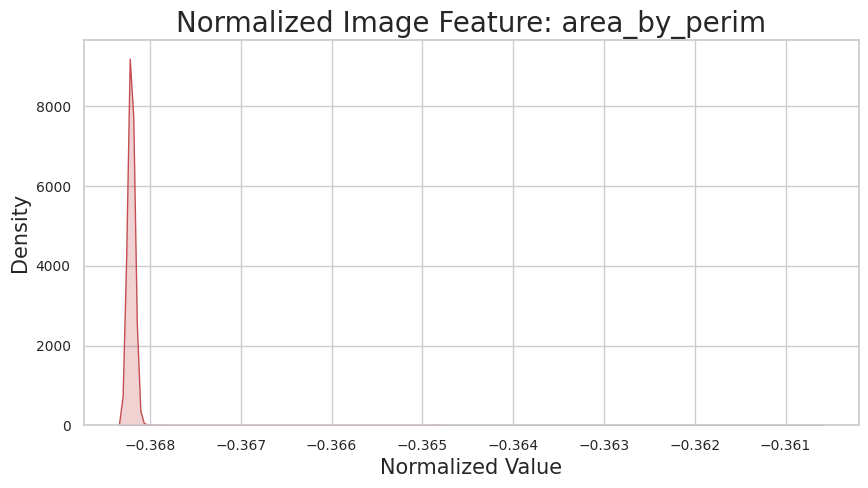

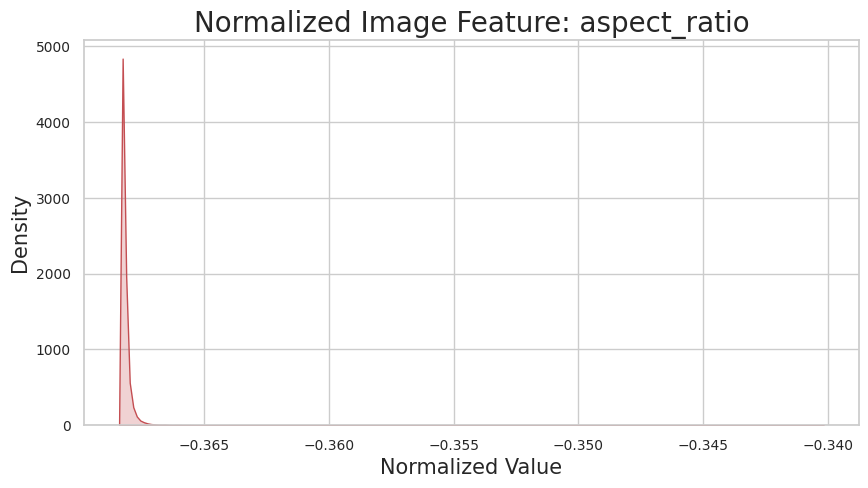

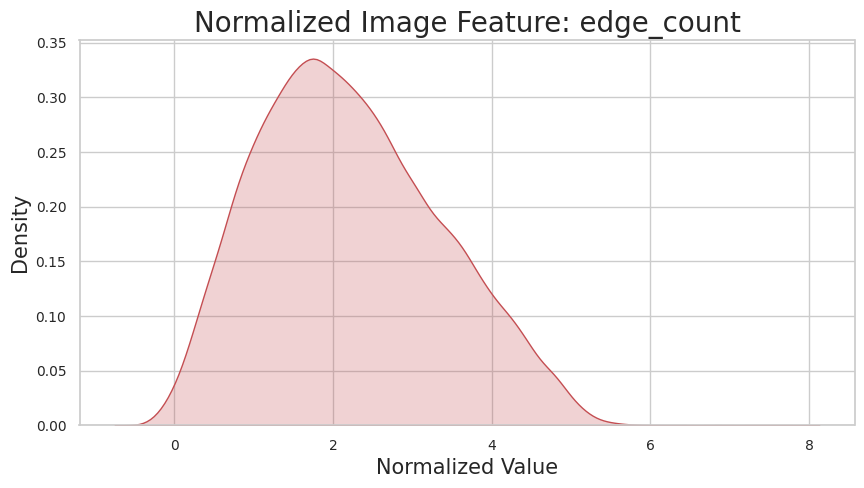

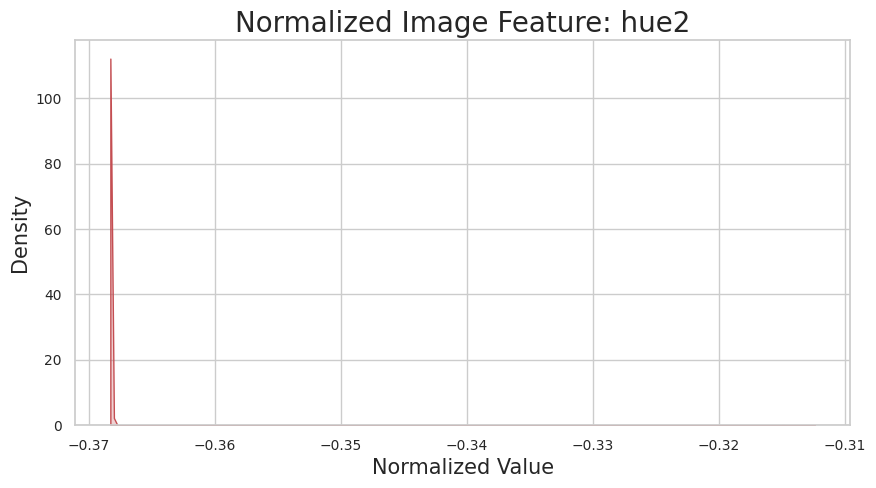

In [19]:
# plot kde plot for each feature separately
for col in feat_df.columns:
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 5))
    ax = sns.kdeplot(feat_df[col], fill=True, color="r")
    plt.xlabel('Normalized Value', fontsize=15)
    plt.ylabel('Density', fontsize=15)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.title('Normalized Image Feature: '+col, fontsize=20)
    plt.show()


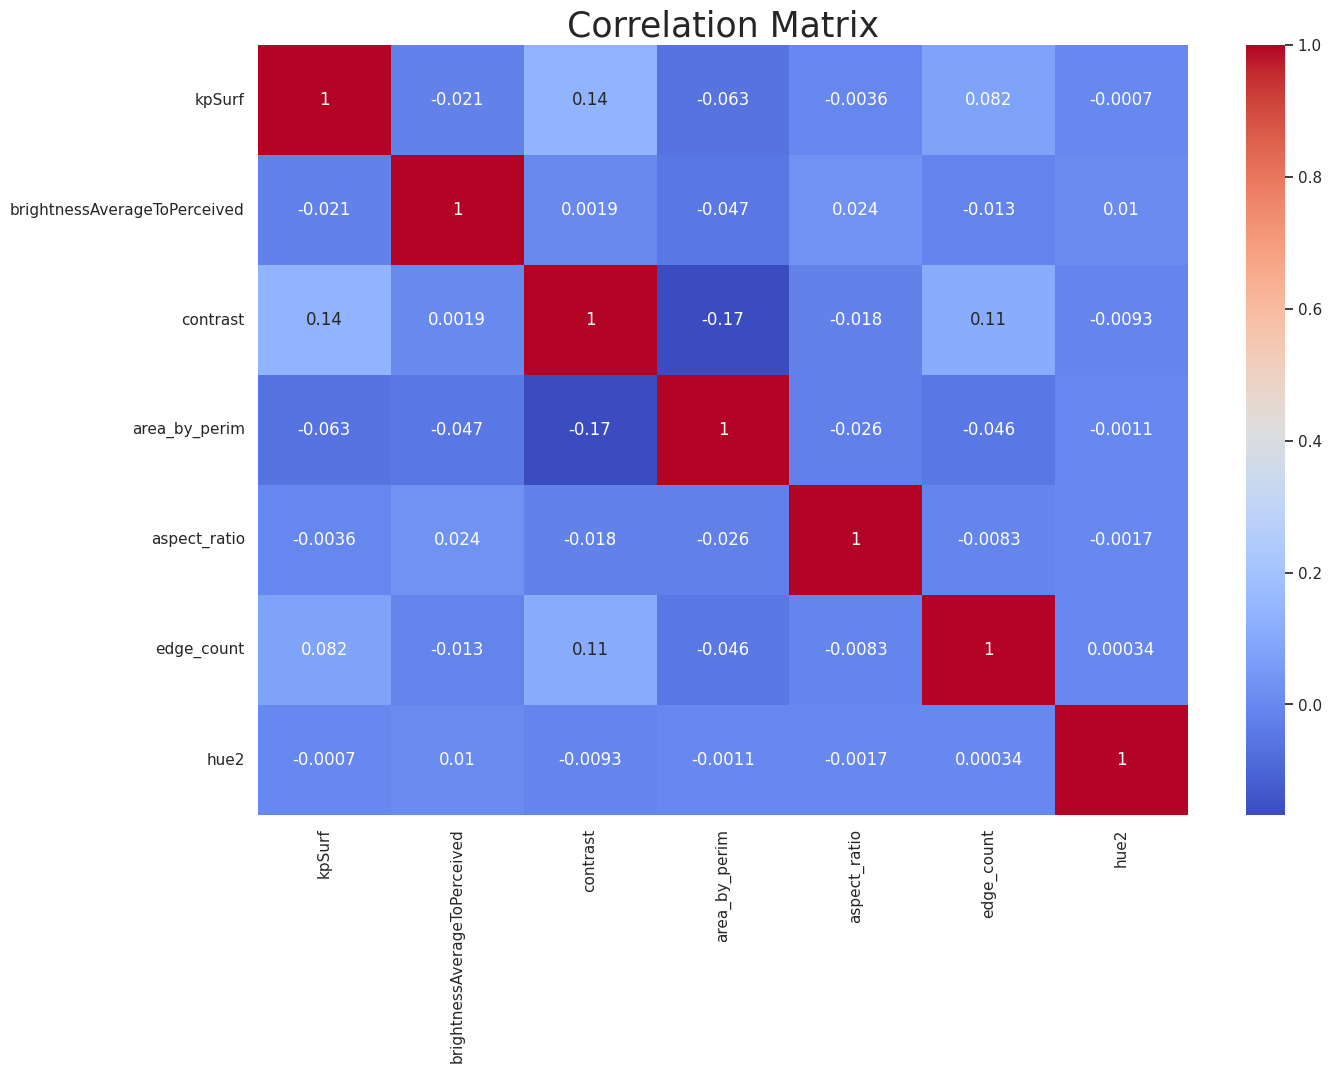

In [17]:
# plot correlation matrix
corr = feat_df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix', fontsize=25)
plt.show()


## Our feature analysis

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# read csv file
df = pd.read_csv('./ilsvrc2012_features.csv')
df = df.drop(['filename'], axis=1)


In [57]:
df.describe()


,n_keypoints,avg_brightness,brightness_rms,avg_perc_brightness,perc_brightness_rms,contrast,edge_length1,edge_length2,edge_length3,edge_length4,...,edge_angle7,area_by_perim,aspect_ratio,hue1,hue2,hue3,hue4,hue5,hue6,hue7
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04
mean,195.044260,115.107250,10.102042,0.441391,0.501720,57.404923,3930.200480,39.304640,9.358640,3.482140,...,2822.700500,109.188207,1.182530,1.051238e+05,4.200259e+04,1.231203e+04,1.832423e+04,3.432365e+04,6.098710e+03,1.314083e+04
std,21.808412,34.350709,0.770268,0.137645,0.129239,15.207162,4955.428342,56.182408,11.541062,4.265438,...,3547.050801,39.846500,0.294588,2.111869e+05,1.082970e+05,4.804647e+04,6.387175e+04,9.582261e+04,2.004824e+04,4.336155e+04
min,6.000000,2.343269,1.497175,0.007575,0.013489,3.907879,5.000000,0.000000,0.000000,0.000000,...,0.000000,5.254023,0.204268,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,200.000000,94.324464,10.017690,0.356612,0.422407,47.104187,1852.750000,13.000000,3.000000,1.000000,...,1073.000000,100.039616,0.947467,4.009375e+04,6.780750e+03,1.056000e+03,9.320000e+02,2.575000e+03,5.350000e+02,1.569000e+03
50%,200.000000,115.090153,10.300486,0.440742,0.500073,57.225405,3127.000000,28.000000,7.000000,2.000000,...,2083.000000,106.887743,1.333333,7.928600e+04,2.134550e+04,4.124000e+03,5.533500e+03,1.503400e+04,2.002500e+03,5.206000e+03
75%,200.000000,134.481658,10.482292,0.520317,0.575596,67.290331,4953.000000,51.000000,13.000000,5.000000,...,3742.000000,109.459172,1.333333,1.322775e+05,5.019900e+04,1.169000e+04,1.828600e+04,4.258125e+04,5.742000e+03,1.353500e+04
max,200.000000,245.673187,13.176842,0.963424,0.974671,119.675725,300329.000000,4077.000000,779.000000,269.000000,...,201810.000000,1054.432882,5.862595,8.739332e+06,1.012473e+07,5.254598e+06,5.647905e+06,6.469506e+06,1.098698e+06,5.030874e+06


In [58]:
# skip edge and hue columns
not_edge_hue_colnames = [c for c in df.columns if 'edge' not in c and 'hue' not in c]
feat_df = df[not_edge_hue_colnames]


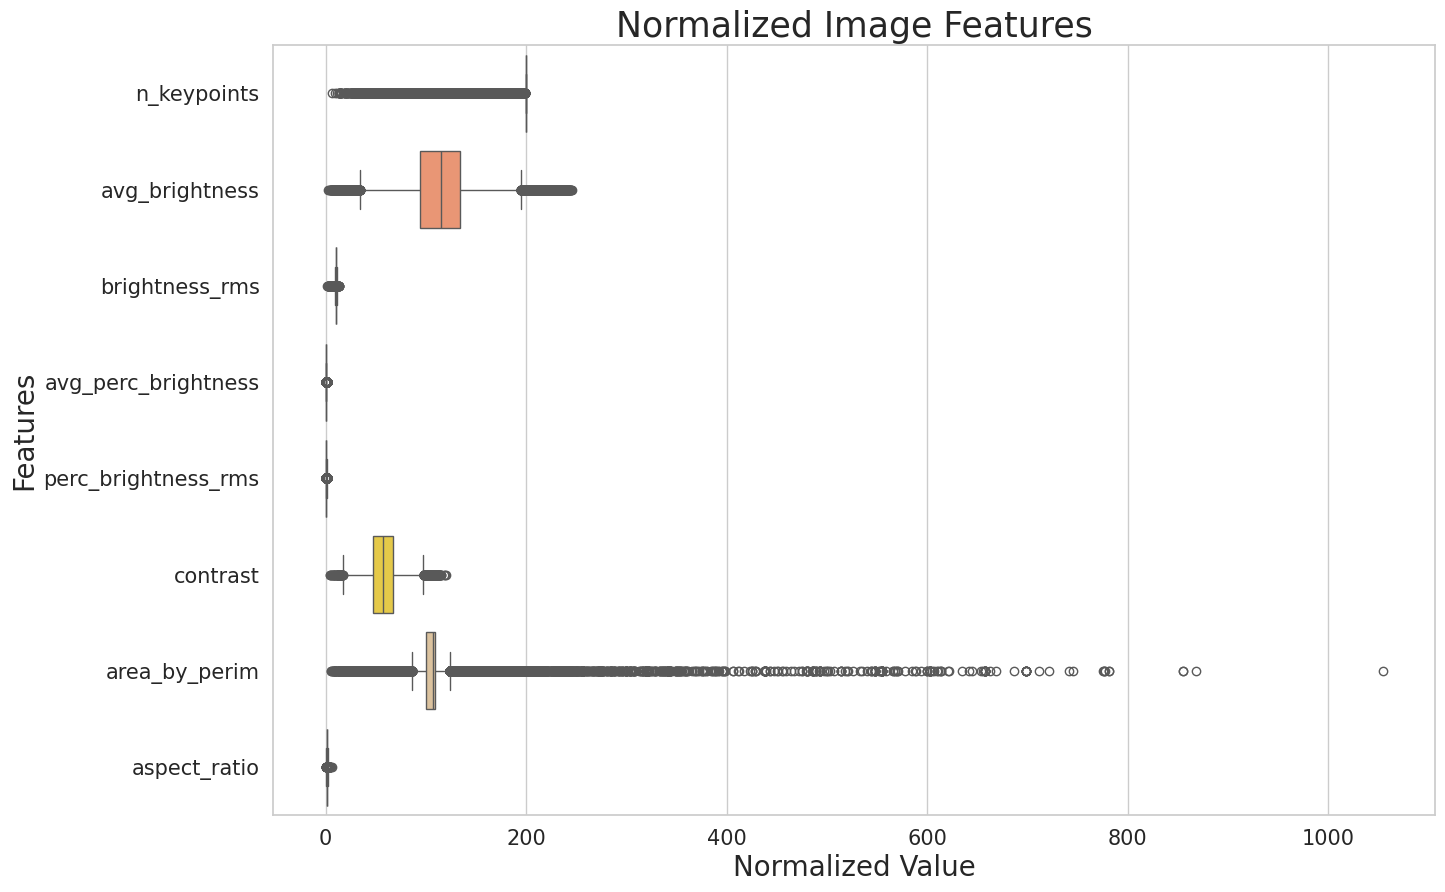

In [59]:
# plot
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))
ax = sns.boxplot(data=feat_df, orient="h", palette="Set2")
plt.xlabel('Normalized Value', fontsize=20)
plt.ylabel('Features', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Normalized Image Features', fontsize=25)
plt.show()


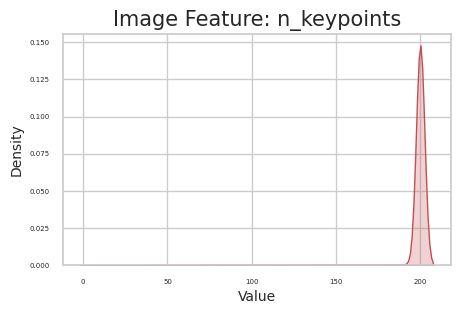

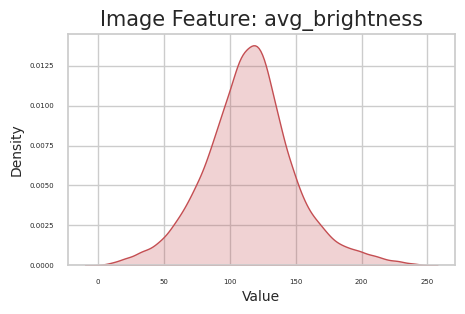

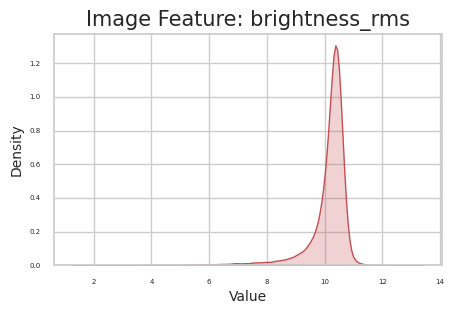

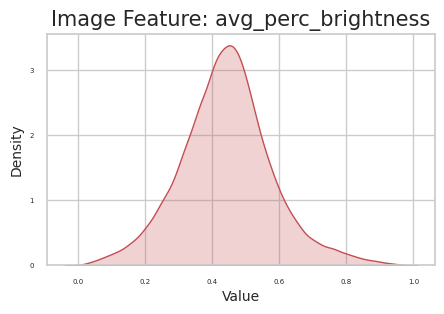

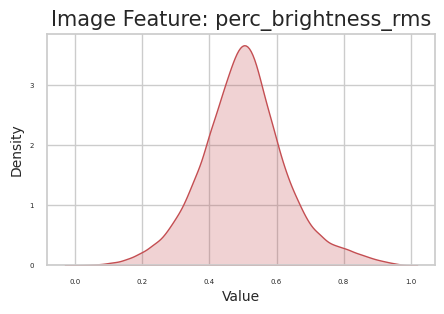

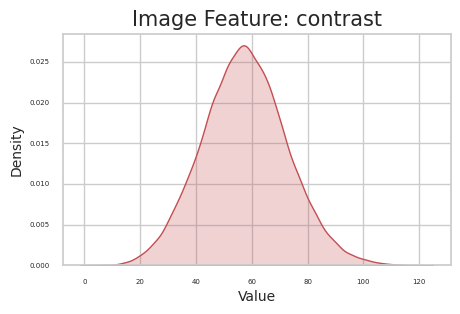

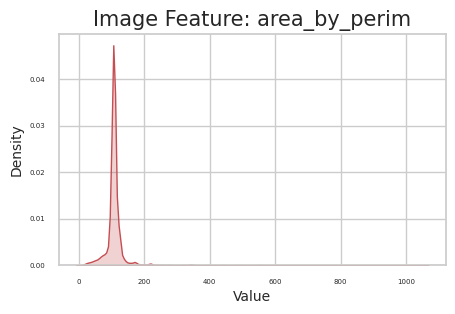

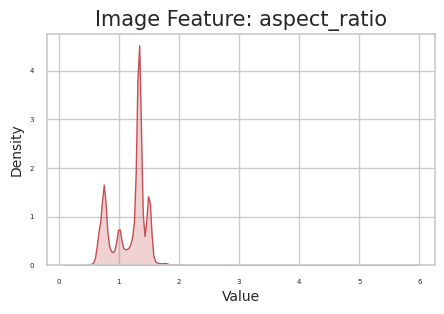

In [60]:
# plot kde plot for each feature separately
for col in feat_df.columns:
    sns.set(style="whitegrid")
    plt.figure(figsize=(5, 3))
    ax = sns.kdeplot(feat_df[col], fill=True, color="r")
    plt.xlabel('Value', fontsize=10)
    plt.ylabel('Density', fontsize=10)
    plt.xticks(fontsize=5)
    plt.yticks(fontsize=5)
    plt.title('Image Feature: '+col, fontsize=15)
    plt.show()


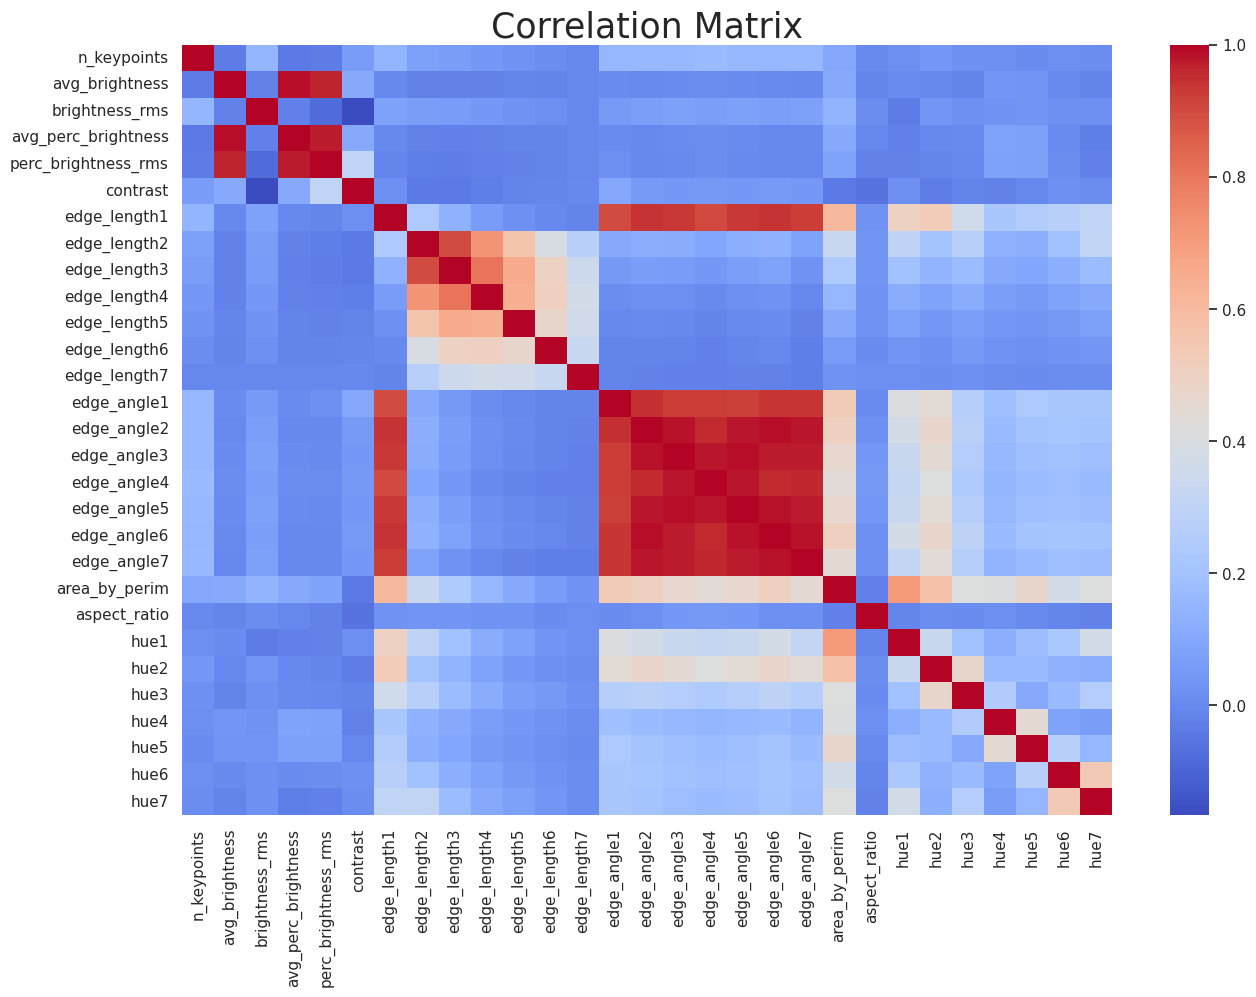

In [61]:
# plot correlation matrix without numbers
corr = df.corr(method='pearson')
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix', fontsize=25)
plt.show()


In [62]:
print("Hue1 and Hue2 correlation: ", corr['hue1']['hue2'])
print("Edge angle 1 and Edge angle 2 correlation: ", corr['edge_angle1']['edge_angle2'])
print("Edge length 6 and Edge length 7 correlation: ", corr['edge_length6']['edge_length7'])
# avg_brightness , brightness_rms, avg_perc_brightness, perc_brightness_rms
print("Brightness correlation: ")
corr.iloc[1:5, 1:5]


Hue1 and Hue2 correlation:  0.339511142113526
Edge angle 1 and Edge angle 2 correlation:  0.9467658417109921
Edge length 6 and Edge length 7 correlation:  0.327007645553843
Brightness correlation: 


,avg_brightness,brightness_rms,avg_perc_brightness,perc_brightness_rms
avg_brightness,1.000000,-0.016651,0.987033,0.963659
brightness_rms,-0.016651,1.000000,-0.021651,-0.082369
avg_perc_brightness,0.987033,-0.021651,1.000000,0.976911
perc_brightness_rms,0.963659,-0.082369,0.976911,1.000000


## Machine translation feature analysis

In [2]:
# load data
import pandas as pd
df = pd.read_csv('./wmt16_features.csv')
df.columns


Index(['n_words', 'n_tokens', 'avg_noun', 'avg_verb', 'avg_adj', 'avg_sat_adj',
       'avg_adverb', 'avg_punc', 'avg_word_length', 'bow_0',
       ...
       'bow_7754', 'bow_7755', 'bow_7756', 'bow_7757', 'bow_7758', 'bow_7759',
       'bow_7760', 'bow_7761', 'bow_7762', 'bow_7763'],
      dtype='object', length=7773)

In [4]:
bow_cols = [c for c in df.columns if 'bow' in c]
df_no_bow = df.drop(bow_cols, axis=1)
df_no_bow.describe()


,n_words,n_tokens,avg_noun,avg_verb,avg_adj,avg_sat_adj,avg_adverb,avg_punc,avg_word_length
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,29.568400,28.330200,0.162311,0.095681,0.064132,0.064132,0.042207,0.105872,4.245030
std,17.653126,17.484299,0.072902,0.049290,0.051943,0.051943,0.046914,0.066552,0.620135
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,17.000000,16.000000,0.117647,0.066667,0.025641,0.025641,0.000000,0.066667,3.888365
50%,26.000000,24.000000,0.161290,0.095238,0.060000,0.060000,0.033333,0.093750,4.270270
75%,38.000000,37.000000,0.206897,0.125000,0.095238,0.095238,0.066667,0.125440,4.645161
max,149.000000,148.000000,0.666667,0.400000,0.333333,0.333333,0.333333,0.625000,6.545455


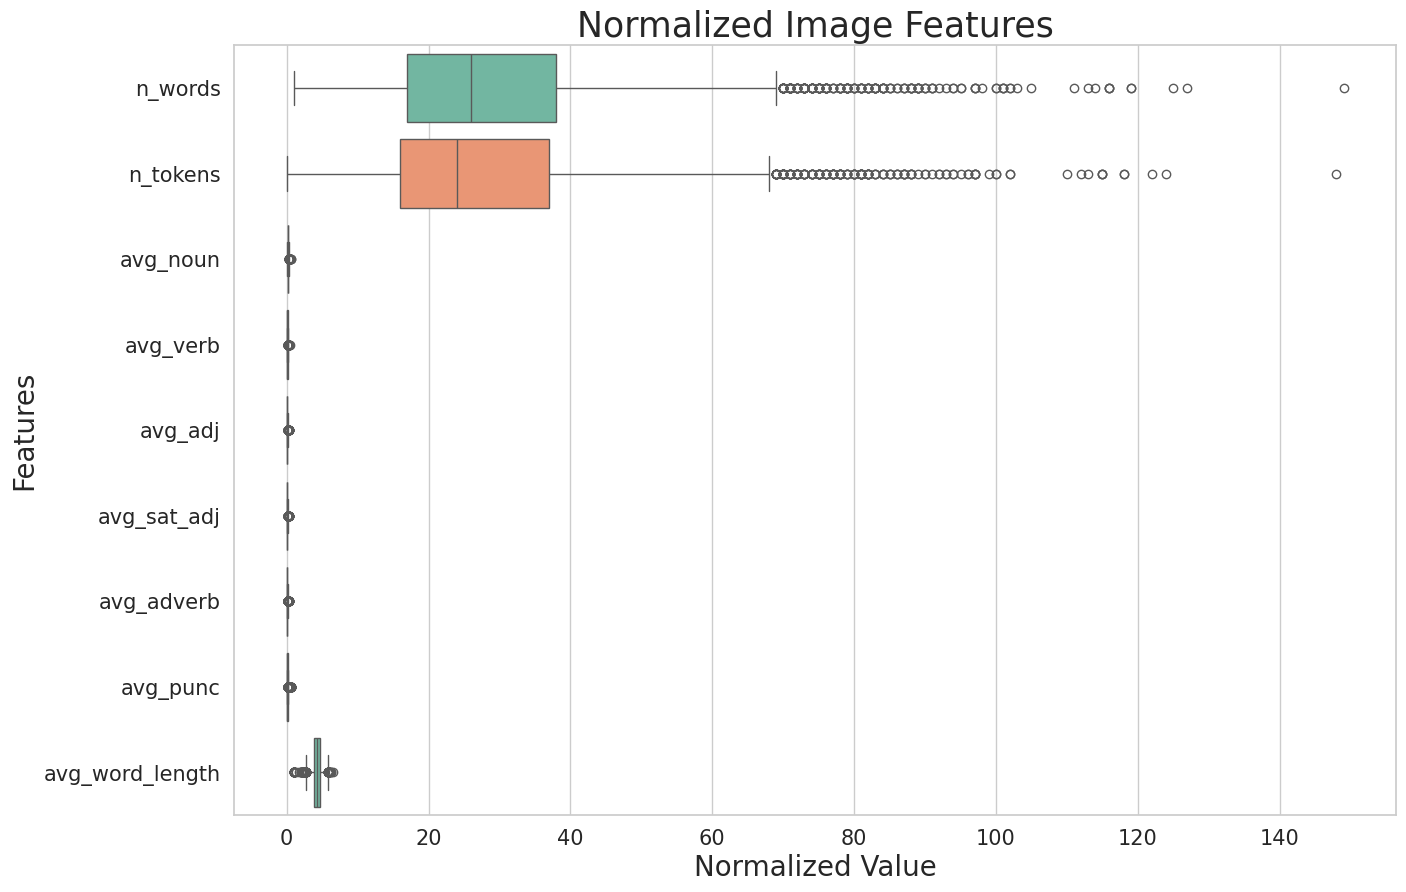

In [5]:
# plot boxplot
from matplotlib import pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))
ax = sns.boxplot(data=df_no_bow, orient="h", palette="Set2")
plt.xlabel('Normalized Value', fontsize=20)
plt.ylabel('Features', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Normalized Image Features', fontsize=25)
plt.show()


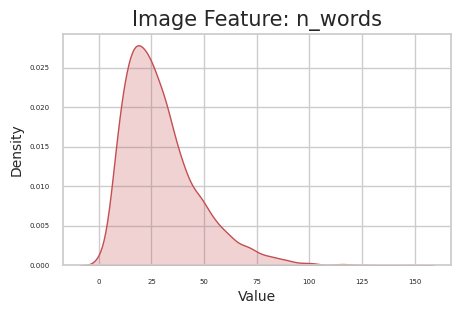

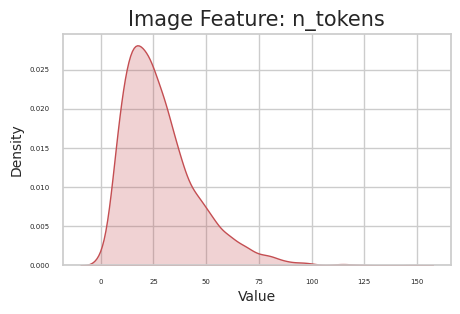

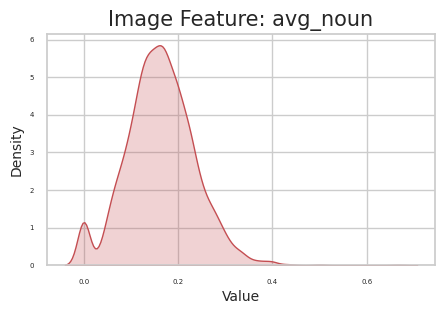

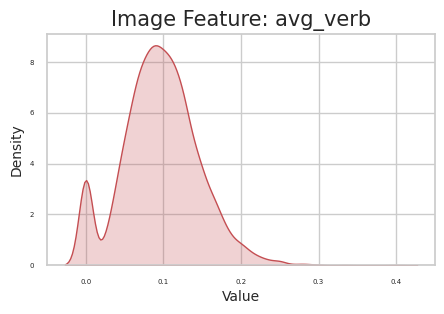

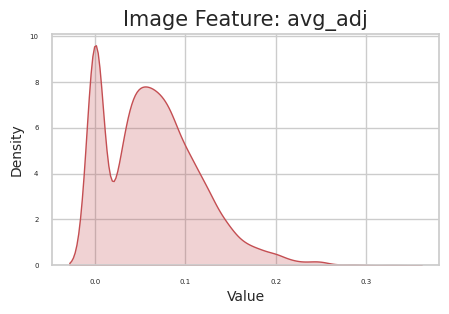

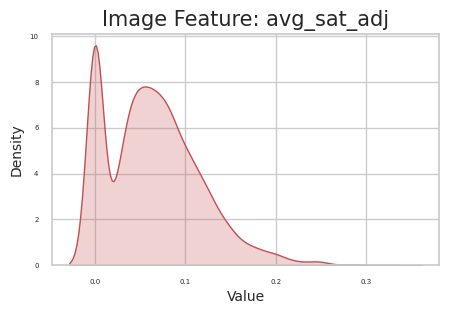

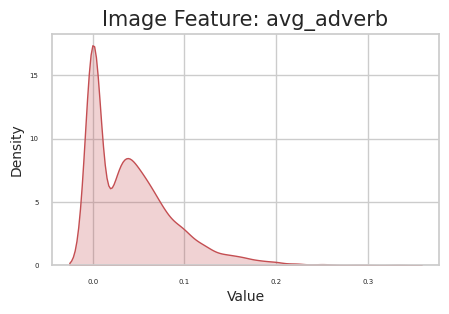

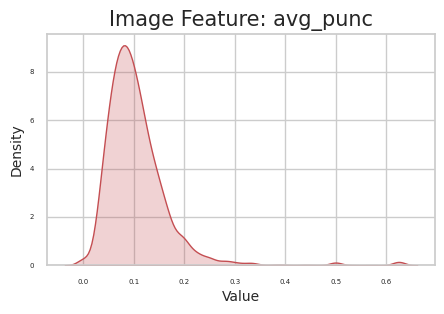

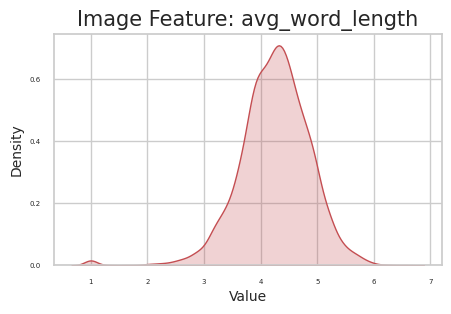

In [6]:
# kde for each feature
for col in df_no_bow.columns:
    sns.set(style="whitegrid")
    plt.figure(figsize=(5, 3))
    ax = sns.kdeplot(df_no_bow[col], fill=True, color="r")
    plt.xlabel('Value', fontsize=10)
    plt.ylabel('Density', fontsize=10)
    plt.xticks(fontsize=5)
    plt.yticks(fontsize=5)
    plt.title('Image Feature: '+col, fontsize=15)
    plt.show()


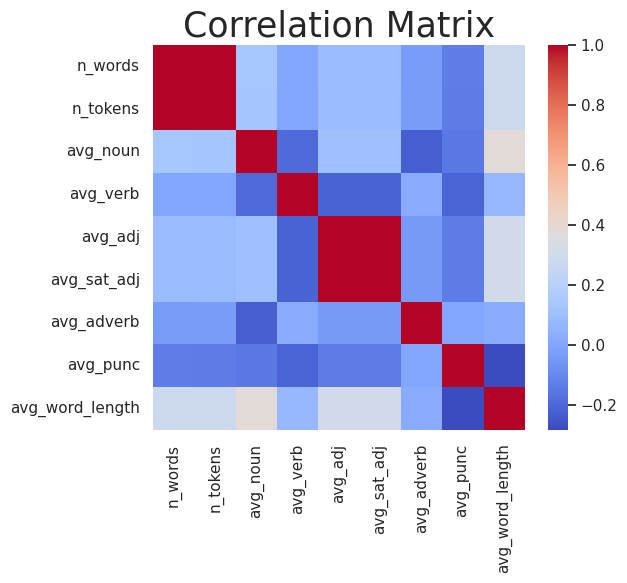

In [11]:
# correlation matrix
corr = df_no_bow.corr(method='pearson')
plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix', fontsize=25)
plt.show()


In [ ]:
# chi2 on bow features
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

X = df[bow_cols]
y = df['score']

chi2score = chi2(X, y)[0]
# select 1500 features with highest chi2 score
k = 1500
kbest = SelectKBest(chi2, k=k).fit(X, y)
kbest_cols = kbest.get_support(indices=True)
kbest_scores = kbest.scores_[kbest_cols]
kbest_features = X.columns[kbest_cols]
kbest_df = pd.DataFrame({'feature': kbest_features, 'score': kbest_scores})
kbest_df.sort_values('score', ascending=False, inplace=True)
kbest_df.head(10)
